# Applying Machine Learning To Sentiment Analysis

# Obtaining the IMDb movie review dataset

The IMDB movie review set can be downloaded from [http://ai.stanford.edu/~amaas/data/sentiment/](http://ai.stanford.edu/~amaas/data/sentiment/).
After downloading the dataset, decompress the files.

A) If you are working with Linux or MacOS X, open a new terminal windowm `cd` into the download directory and execute 

`tar -zxf aclImdb_v1.tar.gz`

B) If you are working with Windows, download an archiver such as [7Zip](http://www.7-zip.org) to extract the files from the download archive.

# Introducing the bag-of-words model

## load_files returns a bunch, containing training texts and training labels


In [ ]:
! wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2022-06-24 17:02:15--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... failed: Connection timed out.
Retrying.

--2022-06-24 17:04:28--  (try: 2)  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... failed: Connection timed out.
Retrying.

--2022-06-24 17:06:40--  (try: 3)  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... failed: Connection timed out.
Retrying.

--2022-06-24 17:08:52--  (try: 4)  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... failed: Connection refused.


In [ ]:
! tar -zxf aclImdb_v1.tar.gz

tar (child): aclImdb_v1.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
#1. Load file folders for training data using sklearn's load_files
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train")

text_train, y_train = reviews_train.data, reviews_train.target

print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

In [ ]:
# clean up html in byte data
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

## Load files manually


In [ ]:
! pip install pyprind

In [ ]:
import pyprind
##conda install -c conda-forge pyprind ##

import pandas as pd
import os

# change the `basepath` to the directory of the
# unzipped movie dataset

basepath = 'aclImdb'

labels = {'pos': 1, 'neg': 0}
pbar = pyprind.ProgBar(50000)
df = pd.DataFrame()
for s in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
            pbar.update()
df.columns = ['review', 'sentiment']

In [ ]:
df.shape

In [ ]:
df['sentiment'].value_counts()

## Transforming documents into feature vectors

By calling the fit_transform method on CountVectorizer, we construct the vocabulary of the bag-of-words model and transformed the following three sentences into sparse feature vectors:
1. The sun is shining
2. The weather is sweet
3. The sun is shining, the weather is sweet, and one and one is two


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet, and one and one is two'])
bag = count.fit_transform(docs)

Now let us print the contents of the vocabulary to get a better understanding of the underlying concepts:

In [ ]:
print(count.vocabulary_) # u signifies text format for unicode text

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


As we can see from executing the preceding command, the vocabulary is stored in a Python dictionary, which maps the unique words that are mapped to integer indices. Next let us print the feature vectors that we just created:

Each index position in the feature vectors shown here corresponds to the integer values that are stored as dictionary items in the CountVectorizer vocabulary. 



In [ ]:
count.get_feature_names_out() # feature names in alphabetical order

array(['and', 'is', 'one', 'shining', 'sun', 'sweet', 'the', 'two',
       'weather'], dtype=object)

In [ ]:
print(bag) # The bagged data counts the frequency of each term in each document.
           # Nonzero data is included, which uses less memory

In [ ]:
print(bag.toarray()) # We can convert bag values to a term document matrix.  
                     # columns are documents 0, 1, and 2 and terms are indexed from left to right across 
                     # columns alphabetically.  Values equal counts of each term per document.

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


### Bag-of-word for movie reviews

In [ ]:
#First, let's limit our data to manage the time it takes to run example code.

#Limit data to documents only

text_train = df['review']

import numpy as np

#keep first and last 20 documents only

text_train1 =  np.array(text_train[0:19]) # twenty reviews with negative sentiment
text_train2 = np.array(text_train[49978:49999])# twenty reviews with positive sentiment
print(np.concatenate((text_train1, text_train2 ), axis=0).shape) # forty total

text_train = np.concatenate((text_train1, text_train2 ), axis=0)

(40,)


In [ ]:
vect = CountVectorizer().fit(text_train)
X = vect.transform(text_train)
print("X:\n{}".format(repr(X)))

X:
<40x2191 sparse matrix of type '<class 'numpy.int64'>'
	with 5062 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[210:230]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 2191
First 20 features:
['000' '10' '12' '13' '138' '15' '17' '18' '1920' '1940' '1951' '1979'
 '1980' '1991' '1mln' '20' '2002' '23' '24' '2505']
Features 210 to 230:
['besides' 'best' 'better' 'between' 'beyond' 'big' 'bigger' 'biggest'
 'bin' 'bit' 'blame' 'bleachers' 'blecch' 'blender' 'blind' 'blond'
 'blood' 'bludgeons' 'blue' 'blurts']
Every 200th feature:
['000' 'before' 'concerned' 'effects' 'gained' 'intellectually' 'matter'
 'perfection' 'richard' 'spot' 'truely']


# Build a model to predict positive or negative reviews

In [ ]:
# Define X, y data
X = X

#adjusting y to smaller dataset for example
y_1 = np.array(df['sentiment'])[0:19],

y_2 = np.array(df['sentiment'])[49978:49999]

y= np.append(y_1, y_2)

print(X.shape)
print(y.shape)

(40, 2191)
(40,)


In [ ]:
# Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)

(30, 2191)
(30,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.43


In [ ]:

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.57
Best parameters:  {'C': 0.01}


In [ ]:
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.60


# Narrow bag of words to words in at least 10 documents

In [ ]:
vect = CountVectorizer(min_df=10).fit(text_train)
X = vect.transform(text_train)
print("X with min_df: {}".format(repr(X)))

X with min_df: <40x99 sparse matrix of type '<class 'numpy.int64'>'
	with 1689 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:10]))
print("Features 20 to 30:\n{}".format(feature_names[20:30]))
print("Every 10th feature:\n{}".format(feature_names[::10]))

First 50 features:
['about', 'acting', 'actors', 'after', 'all', 'an', 'and', 'are', 'as', 'at']
Features 20 to 30:
['did', 'do', 'don', 'even', 'ever', 'film', 'first', 'for', 'from', 'get']
Every 10th feature:
['about', 'be', 'did', 'good', 'is', 'much', 'out', 'such', 'time', 'what']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Need index of new X data to subset y data accurately for new models
X.shape

(40, 99)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)


grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

(30, 99)
(30,)
Best cross-validation score: 0.57


### Limit vocabulary to meaningful words by deleting Stop-words

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['though', 'else', 'him', 'under', 'de', 'go', 'us', 'much', 'against', 'well', 'therein', 'itself', 'something', 'would', 'hereupon', 'could', 'less', 'been', 'her', 'hasnt', 'now', 'both', 'mostly', 'next', 'without', 'very', 'be', 'anything', 'due', 'than', 'another', 'an']


In [ ]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own by building our own list.

vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X = vect.transform(text_train)
print("X with stop words:\n{}".format(repr(X_train)))

X with stop words:
<30x99 sparse matrix of type '<class 'numpy.int64'>'
	with 1250 stored elements in Compressed Sparse Row format>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.53


### Rescaling the Data with tf-idf

Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in text mining. 

The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. 

Tf-idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf-idf. 

The inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely. (From Wikipedia/Python for Machine Learning)

\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1
\end{equation*}

In [ ]:
# If we reweight our data in this way we increase the weight of repeated rare words in comments.  

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


Best cross-validation score: 0.53
Best parameters:  {'C': 0.001}


In [ ]:
grid.best_estimator_

LogisticRegression(C=0.001)

#### Investigating model coefficients

In [ ]:
# helper function to plot top positive and negative coefficients

def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")



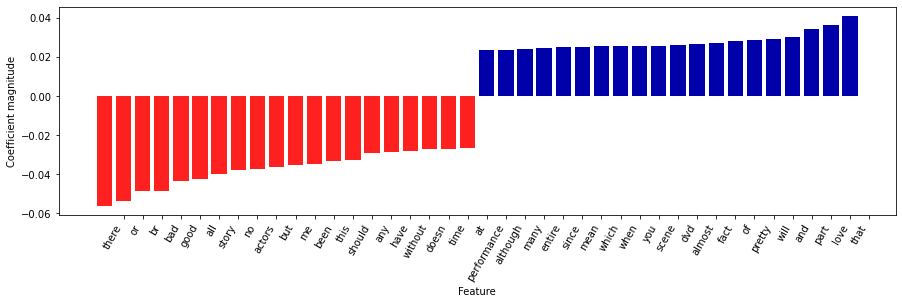

In [ ]:
import matplotlib.pyplot as plt


coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()


visualize_coefficients(coefs, feature_names, n_top_features=20)

#### Bag of words with more than one word (n-grams)

In [ ]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [ ]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 13
Vocabulary:
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [ ]:
# keep bi-grams only

cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 14
Vocabulary:
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [ ]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [ ]:
# keep single words, bi-grams, AND tri-grams

cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 39
Vocabulary:
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [ ]:

vect = TfidfVectorizer(ngram_range=(1,3) ,min_df=5, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.63
Best parameters:
{'C': 0.001}


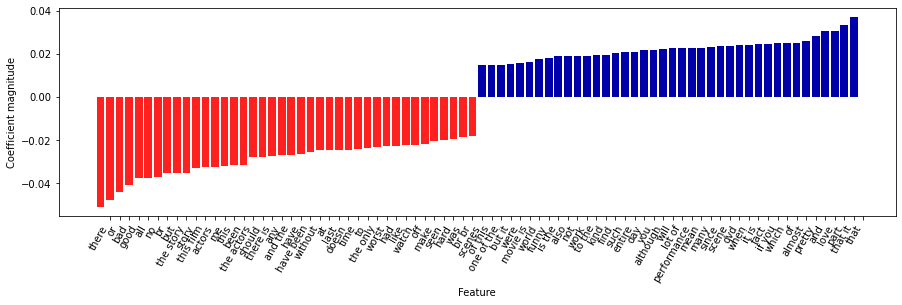

In [ ]:
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=40)


In [ ]:
# find 2 and 3-gram features only

vect = TfidfVectorizer(ngram_range=(2,3) ,min_df=3, norm=None).fit(text_train)
X = vect.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))



Best cross-validation score: 0.83
Best parameters:
{'C': 0.1}


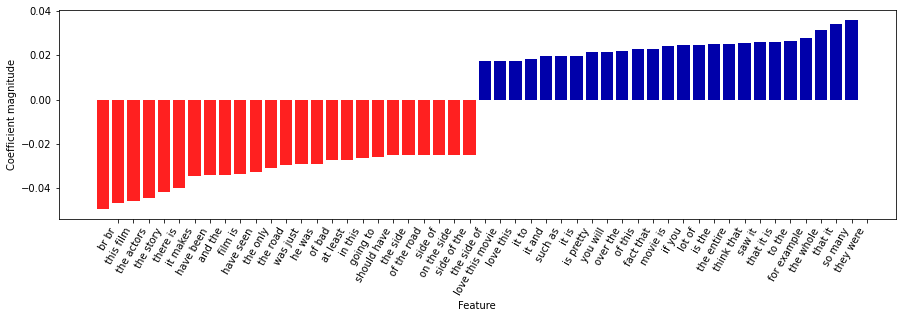

In [ ]:
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()


visualize_coefficients(coefs, feature_names, n_top_features=25)